# Real Estate Price Predictor 

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv("data.csv")

In [3]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       495 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,495.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287059,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702206,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.622000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing_data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

## Splitting the data using stratified train test split
* We are applying stratified train test split here so that the "Chas" binary feature will be split into equal ratio in both training and testing data.
* Thus the machine will learn both 0 and 1 of the "Chas" feature and not only 0 or 1.

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing_data,housing_data['CHAS']):
    strat_train_df = housing_data.loc[train_index]
    strat_test_df = housing_data.loc[test_index]

In [8]:
strat_train_df["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [9]:
strat_test_df["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [10]:
X_train_df = strat_train_df.drop(columns="MEDV")

In [11]:
X_test_df = strat_test_df.drop(columns="MEDV")

## Creating a pipeline 

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
my_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy='median',missing_values=np.nan)),
    # we can add more estimators/transformers to this list as per our convinience
    ("std_scalar",StandardScaler())
])

### Using pipeline for training data

In [14]:
X_train = my_pipeline.fit_transform(X_train_df)

In [15]:
X_train.shape

(404, 13)

### Using pipeline for test data

In [16]:
X_test = my_pipeline.fit_transform(X_test_df)

In [17]:
X_test.shape

(102, 13)

## Plotting histogram to visualize the training data

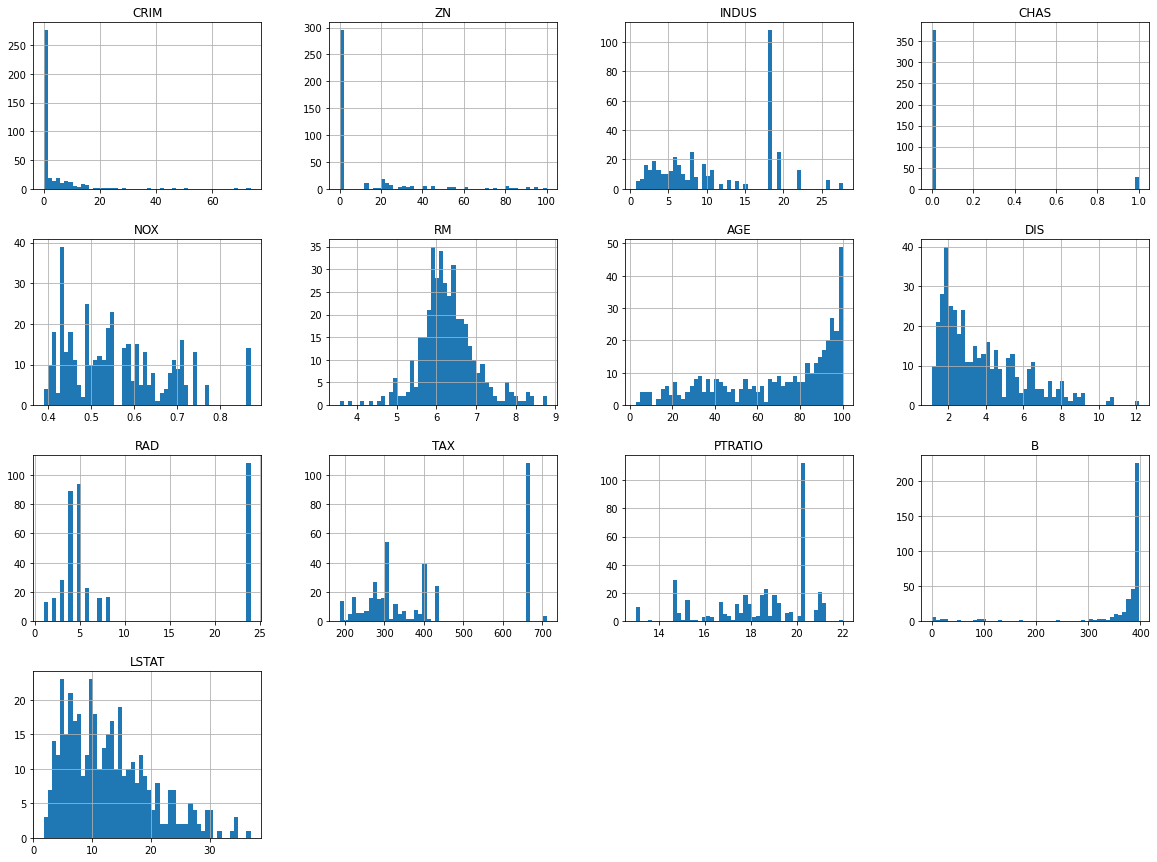

In [18]:
X_train_df.hist(bins=50,figsize=(20,15))
plt.show()

## To find Correlation between the data(Pearson Correlation Co-effiecient)

In [19]:
corr_matrix = strat_train_df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.676855
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

## Plotting correlations

In [20]:
import seaborn as sns

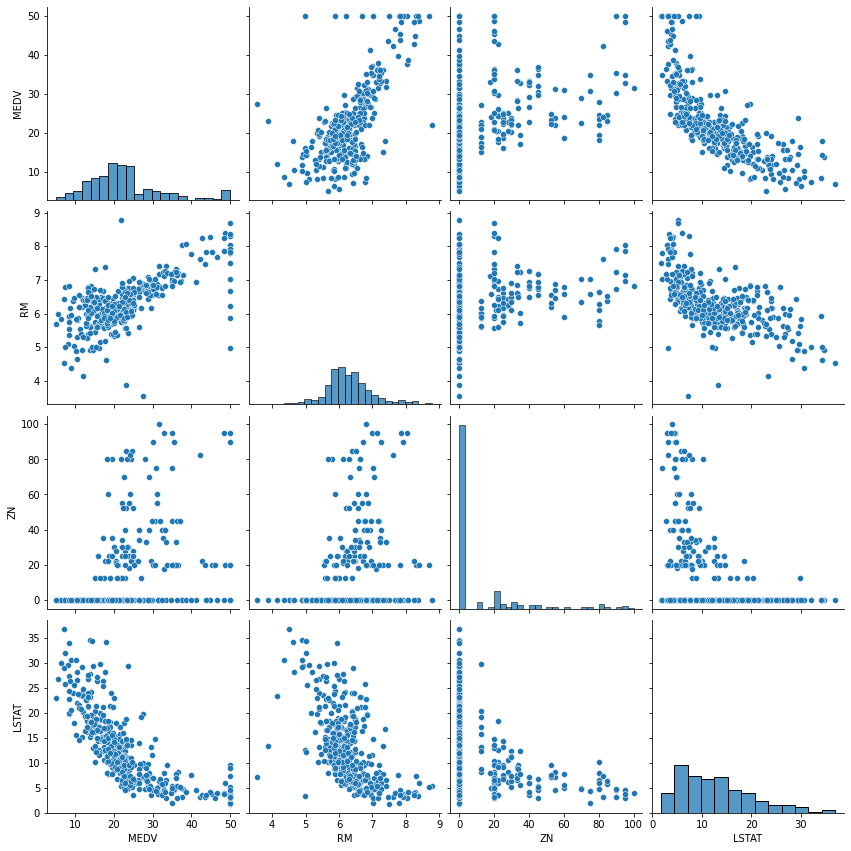

In [21]:
sns.pairplot(strat_train_df,vars=["MEDV","RM","ZN","LSTAT"],height=3)
plt.show()

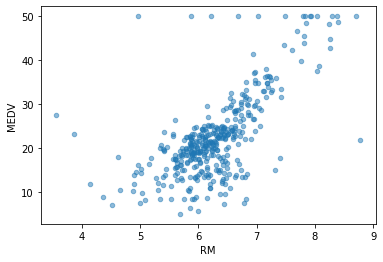

In [22]:
strat_train_df.plot(kind="scatter",x="RM",y="MEDV",alpha=0.5)
plt.show()

In [23]:
y_train_df = strat_train_df["MEDV"]
y_train = np.array(y_train_df)

In [24]:
y_test_df = strat_test_df["MEDV"]
y_test = np.array(y_test_df)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Selecting model for training

### Linear Regression 

In [26]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression()
# reg.fit(X_train,y_train)

### Decision Tree Regressor

In [27]:
# from sklearn.tree import DecisionTreeRegressor
# reg = DecisionTreeRegressor()
# reg.fit(X_train,y_train)

### RandomForest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

## Evaluating the model

In [29]:
from sklearn.metrics import mean_squared_error
pred = reg.predict(X_train)
mse = mean_squared_error(y_train,pred)
rmse = np.sqrt(mse)

In [30]:
rmse

1.2721760796850297

## Cross validation of model

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,X=X_train,y=y_train,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [32]:
rmse_scores

array([2.93766278, 2.81199062, 4.5722534 , 2.57864436, 3.31432875,
       3.60211748, 4.87254782, 3.36739789, 2.70466827, 3.48967743])

## Function to print mean and std.deviation

In [33]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std. Deviation:",scores.std())

In [34]:
print_scores(rmse_scores)

Scores: [2.93766278 2.81199062 4.5722534  2.57864436 3.31432875 3.60211748
 4.87254782 3.36739789 2.70466827 3.48967743]
Mean: 3.4251288806345492
Std. Deviation: 0.7287783299562655


## To save the model using joblib

In [35]:
from joblib import dump,load
dump(reg, 'Real_Estate.joblib') 

['Real_Estate.joblib']

## Testing the model

In [36]:
y_pred = reg.predict(X_test)
final_mse = mean_squared_error(y_pred,y_test)
final_rmse = np.sqrt(final_mse)
final_rmse

3.4527107494847913